# Telecom Churn Case Study :::

## Business Objective :::

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Data :::

Dataset has been provided with data dictionary containing all the abbreviations used for all the features in data file.

##  Importing Required Libraries

In [514]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

<b>Please note that below path is a local directory path. <i>Kindly change the path to the respective directory path from where this jupyter notebook is being executed </i></b>

In [287]:
# read data
churn_data_org = pd.read_csv("E:/UPgrad/Telecom_churn_CaseStudy_Bharti_Rachna/telecom_churn_data.csv")

## Data Routine Check

In [515]:
# Keeping the original copy and creating one more copy of the dataset
churn_data = churn_data_org.copy()
print('Dataframe Shape: ', churn_data.shape); 
print("Dataframe Info: \n"); churn_data.info(); 
churn_data.head(5)

Dataframe Shape:  (99999, 226)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [516]:
churn_data.select_dtypes(object).head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [290]:
# summing up the missing values (column-wise)
churn_data.isnull().sum()

# Percentage of missing values (column_wise)
round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [291]:
# Columns with more than 70% missing values
round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2) [round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2) >=70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

## Handling of Categorical Variables:: 

Below are the categorical variables with missing values percentage more than 70%

CATEGORICAL VARIABLES:

1. night_pck_user_6
2. night_pck_user_7
3. night_pck_user_8
4. night_pck_user_9
5. fb_user_6
6. fb_user_7
7. fb_user_8
8. fb_user_9

Hence before deleting all the above variables, we will try and replace a new category for all categorical variables and drop all the remaining columns with more than 70% missing values.

In [517]:
# Missing values can be imputed with '-1'  as a new category. 

for var in ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]:
    churn_data[var].fillna(value=-1, inplace=True)

In [518]:
# Create dummy variables for all the six categorial variables

night_pck_user_6_dummy = pd.get_dummies(churn_data['night_pck_user_6'], prefix="night_pck_6", drop_first=True)
night_pck_user_7_dummy = pd.get_dummies(churn_data['night_pck_user_7'], prefix="night_pck_7", drop_first=True)
night_pck_user_8_dummy = pd.get_dummies(churn_data['night_pck_user_8'], prefix="night_pck_8", drop_first=True)

fb_user_6_dummy = pd.get_dummies(churn_data['fb_user_6'], prefix="fb_user_6", drop_first=True)
fb_user_7_dummy = pd.get_dummies(churn_data['fb_user_7'], prefix="fb_user_7", drop_first=True)
fb_user_8_dummy = pd.get_dummies(churn_data['fb_user_8'], prefix="fb_user_8", drop_first=True)

churn_data = pd.concat([churn_data,night_pck_user_6_dummy],axis=1)
churn_data = pd.concat([churn_data,night_pck_user_7_dummy],axis=1)
churn_data = pd.concat([churn_data,night_pck_user_8_dummy],axis=1)

churn_data = pd.concat([churn_data,fb_user_6_dummy],axis=1)
churn_data = pd.concat([churn_data,fb_user_7_dummy],axis=1)
churn_data = pd.concat([churn_data,fb_user_8_dummy],axis=1)

# drop all categorial columns
churn_data = churn_data.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [519]:
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_6_0.0,night_pck_6_1.0,night_pck_7_0.0,night_pck_7_1.0,night_pck_8_0.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,

### Columns which are to be used for filtering high-value customers, can't be dropped. 
They are as below :
1. total_rech_data_6 
2. total_rech_data_7 
3. av_rech_amt_data_6 
4. av_rech_amt_data_7 

All the above columns have more than 70% missing values

<Figure size 432x288 with 0 Axes>

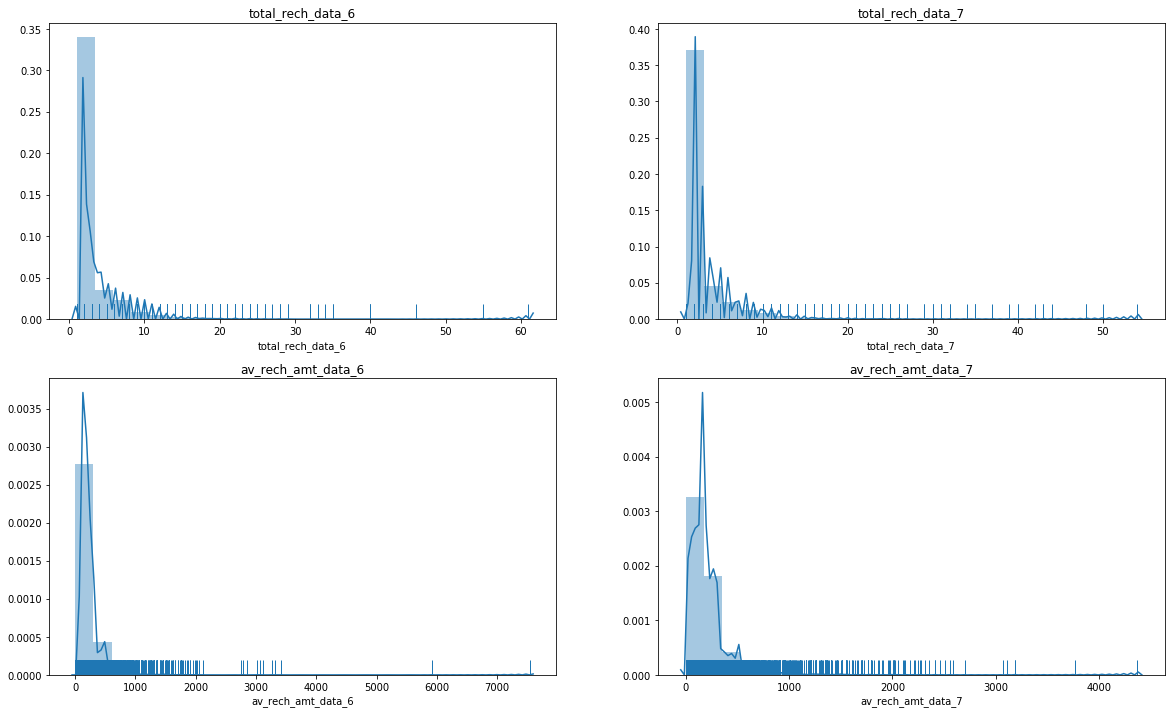

In [296]:
# We need to impute the missing values with the meaning ful values using the below distribution plots

# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(20,12))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
sns.distplot(churn_data.total_rech_data_6.dropna(),bins=25, rug=True)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
sns.distplot(churn_data.total_rech_data_7.dropna(),bins=25, rug=True)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
sns.distplot(churn_data.av_rech_amt_data_6.dropna(),bins=25, rug=True)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
sns.distplot(churn_data.av_rech_amt_data_7.dropna(),bins=25, rug=True)

All the variables - The minimum value is 1, and not zero, 
The rows with missing values also have the corresponding 'dates of recharge' columns with missing values -- which indicates that no recharge was done in this month. <br><br>
Thus, missing values for the above columns can be imputed with 0.

In [520]:
churn_data.total_rech_data_6.fillna(value=0, inplace=True)
churn_data.total_rech_data_7.fillna(value=0, inplace=True)
churn_data.total_rech_data_8.fillna(value=0, inplace=True)
churn_data.total_rech_data_9.fillna(value=0, inplace=True)

churn_data.av_rech_amt_data_6.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_7.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_8.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [521]:
round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2) [round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2) >=70]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8                  73.66
arpu_2g_9                  74.08
dtype: float64

In [522]:
# Now dropping the remaining columns with missing values percentage more than 70% 

len(round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2) [round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2) >70].index)

24

In [523]:
churn_data.drop(round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2) [round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2) >70].index, axis=1, inplace=True)

In [524]:
churn_data.shape

(99999, 208)

In [525]:
churn_data.select_dtypes(['int64','float64'])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.00,1.00,1.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,-1.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1.00,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,

## Imputation of multiple columns missing values with Iterative Imputer

After dropping all the columns with more than 70% of missing values, there still remains many numerical columns that have few missing values and instead of replacing them one by one with other statistical measures which is time taking, we will be using IterativeImputer functionality of python module.

In [528]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

In [529]:
imp_mean = IterativeImputer(random_state=0)

In [530]:
imputer_list  = churn_data.select_dtypes(['int64','float64']).columns.tolist()

In [531]:
imputed = pd.DataFrame(imp_mean.fit_transform(churn_data[imputer_list]))

In [532]:
imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,7000842753.00,109.00,0.00,0.00,0.00,197.38,214.82,213.80,21.10,-44.39,-16.81,0.00,-33.15,186.82,174.47,0.00,172.48,32.26,22.60,0.00,22.54,13.26,4.86,0.00,3.52,41.47,28.05,0.00,35.50,93.31,91.38,0.00,90.40,3.78,3.80,0.00,3.70,-7.81,-14.63,0.00,-10.73,5.56,-11.81,0.00,-20.89,92.58,94.14,0.00,94.88,87.12,90.61,0.00,86.31,1.19,1.18,0.00,1.08,0.00,0.00,0.00,0.00,120.97,126.92,0.00,121.99,-115.81,-103.84,0.00,-98.24,3.91,4.98,0.00,4.41,0.45,0.04,0.00,0.05,0.00,0.00,0.00,0.00,53.01,40.92,0.16,58.67,107.48,107.12,4.13,106.17,12.07,12.59,1.15,12.16,66.17,59.32,5.44,64.71,23.30,19.74,0.00,25.93,20.72,21.65,0.00,19.62,2.16,2.22,0.00,2.17,0.00,0.00,0.00,0.00,0.47,0.55,0.00,0.06,0.00,0.00,5.44,0.00,-66.89,-65.54,0.00,-66.94,7.81,8.25,0.00,8.08,0.85,1.01,0.00,1.02,4.00,3.00,2.00,6.00,362.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,1.00,1.00,1.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,968.00,30.40,0.00,101.20,3.58
1,7001865778.00,109.00,0.00,0.00,0.00,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9.00,11.00,5.00,74.00,384.00,283.00,121.00,44.00,154.00,65.00,50.00,44.00,23.00,30.00,0.00,0.00,1.00,2.00,0.00,0.00,154.00,50.00,0.00,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,1006.00,0.00,0.00,0.00,0.00
2,7001625959.00,109.00,0.00,0.00,0.00,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,0.00,0.00,0.00,0.00,47.64,108.68,120.94,18.04,0.00,0.00,0.00,0.00,46.56,236.84,96.84,42.08,0.45,0.00,0.00,0.00,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,0.00,0.00,0.00,0.00,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.00,0.00,0.45,0.00,0.85,0.00,0.01,0.93,3.14,0.00,0.36,5.00,4.00,2.00,7.00,168.00,315.00,116.00,358.00,86.00,200.00,86.00,100.00,0.00,200.00,86.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,46.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1103.00,0.00,0.00,4.17,0.00
3,7001204172.00,109.00,0.00,0.00,0.00,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.0

In [533]:
churn_data[imputer_list] = imputed

In [534]:
round(100*(churn_data.isnull().sum()/len(churn_data.index))) [round(100*(churn_data.isnull().sum()/len(churn_data.index))) >0]

last_date_of_month_7   1.00
last_date_of_month_8   1.00
last_date_of_month_9   2.00
date_of_last_rech_6    2.00
date_of_last_rech_7    2.00
date_of_last_rech_8    4.00
date_of_last_rech_9    5.00
dtype: float64

In [535]:
churn_data.shape

(99999, 208)

In [536]:
# Dropping date related columns as there are of no imprtance in predicting the churn customers

churn_data.drop(['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9'], 
            axis=1, inplace=True)


In [537]:
# Also, dropping id related columns as there do not contribute in prediction

churn_data.drop(['mobile_number', 'circle_id'], 
            axis=1, inplace=True)

In [538]:
churn_data.shape

(99999, 198)

In [539]:
round(100*(churn_data.isnull().sum()/len(churn_data.index))) [round(100*(churn_data.isnull().sum()/len(churn_data.index))) >0]

Series([], dtype: float64)

### Now, there are no missing values in the data

# Filtering high value customers

## Calculate total data recharge amount

In [541]:
churn_data['total_data_rech_amt_6'] = churn_data.total_rech_data_6 * churn_data.av_rech_amt_data_6
churn_data['total_data_rech_amt_7'] = churn_data.total_rech_data_7 * churn_data.av_rech_amt_data_7

## Add total data recharge and total recharge to get total combined recharge amount for a month

In [542]:
churn_data['tot_amt_6'] = churn_data.total_rech_amt_6 + churn_data.total_data_rech_amt_6
churn_data['tot_amt_7'] = churn_data.total_rech_amt_7 + churn_data.total_data_rech_amt_7

In [543]:
# calculate average recharge done by customer in June and July
churn_data['av_amt_6_7'] = (churn_data.tot_amt_6 + churn_data.tot_amt_7)/2

In [544]:
# checking the value at the 70th percentile recharge amount to filter the high value customers

print("Recharge amount at 70th percentile: {0}".format(churn_data.av_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [545]:
# retain only those customers who have recharged their mobile numbers with more than or equal to 70th percentile amount

churn_data_filtered = churn_data.loc[churn_data.av_amt_6_7 >= churn_data.av_amt_6_7.quantile(0.7), :]
churn_data_filtered = churn_data_filtered.reset_index(drop=True)
churn_data_filtered.shape

(30001, 203)

In [546]:
# Again, dropping all the variables created for filtering high value customers

churn_data_filtered = churn_data_filtered.drop(['total_data_rech_amt_6', 'total_data_rech_amt_7',
                                      'tot_amt_6', 'tot_amt_7', 'av_amt_6_7'], axis=1)
churn_data_filtered.shape

(30001, 198)

### We're left with 30,001 rows after selecting the high value customers with recharge amount more than that of the amount present at 70th percentile.

# Derive target variable 'churn'

In [547]:
# calculate total incoming and outgoing minutes of usage for the 9th month -churn phase - September month

churn_data_filtered['total_calls_mou_9'] = churn_data_filtered.total_ic_mou_9 + churn_data_filtered.total_og_mou_9

In [548]:
# calculate 2g and 3g data consumption

churn_data_filtered['total_data_mb_9'] =  churn_data_filtered.vol_2g_mb_9 + churn_data_filtered.vol_3g_mb_9

In [549]:
# Derive churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn

churn_data_filtered['churn'] = churn_data_filtered.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_data_mb_9 == 0) else 0, axis=1)

In [550]:
# dropping the derived variables created just for deriving target varibale 'churn'

churn_data_filtered.drop(['total_calls_mou_9', 'total_data_mb_9'], axis=1, inplace=True)

In [552]:
# changing target variable 'churn' numeric data type to category data type

churn_data_filtered.churn = churn_data_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_data_filtered.churn.value_counts()*100/churn_data_filtered.shape[0])

Churn Ratio:
0   91.86
1    8.14
Name: churn, dtype: float64


In [553]:
churn_data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_6_0.0,night_pck_6_1.0,night_pck_7_0.0,night_pck_7_1.0,night_pck_8_0.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,churn
0,0.00,0.00,0.00,197.38,214.82,213.80,21.10,-44.39,-16.81,0.00,-33.15,186.82,174.47,0.00,172.48,32.26,22.60,0.00,22.54,13.26,4.86,0.00,3.52,41.47,28.05,0.00,35.50,93.31,91.38,0.00,90.40,3.78,3.80,0.00,3.70,-7.81,-14.63,0.00,-10.73,5.56,-11.81,0.00,-20.89,92.58,94.14,0.00,94.88,87.12,90.61,0.00,86.31,1.19,1.18,0.00,1.08,0.00,0.00,0.00,0.00,120.97,126.92,0.00,121.99,-115.81,-103.84,0.00,-98.24,3.91,4.98,0.00,4.41,0.45,0.04,0.00,0.05,0.00,0.00,0.00,0.00,53.01,40.92,0.16,58.67,107.48,107.12,4.13,106.17,12.07,12.59,1.15,12.16,66.17,59.32,5.44,64.71,23.30,19.74,0.00,25.93,20.72,21.65,0.00,19.62,2.16,2.22,0.00,2.17,0.00,0.00,0.00,0.00,0.47,0.55,0.00,0.06,0.00,0.00,5.44,0.00,-66.89,-65.54,0.00,-66.94,7.81,8.25,0.00,8.08,0.85,1.01,0.00,1.02,4.00,3.00,2.00,6.00,362.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,1.00,1.00,1.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,968.00,30.40,0.00,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1,1
1,0.0

## Deriving new features

As the first two months 6 & 7, indicate good phase while month 8 belongs to action phase in which customer starts feeling unhappy about the services provided by service prvider. Hence 8 month data may indicate few drastic changes in terms of he is recharging the data or not or whether calls were recharged or not. Hence we will be creating new features with the difference between the value of all the columns for 6th and 7th month subtracted by corresponding value for 8th month.

In [555]:
churn_data_filtered['arpu_diff'] = churn_data_filtered.arpu_8 - ((churn_data_filtered.arpu_6 + churn_data_filtered.arpu_7)/2)

churn_data_filtered['onnet_mou_diff'] = churn_data_filtered.onnet_mou_8 - ((churn_data_filtered.onnet_mou_6 + churn_data_filtered.onnet_mou_7)/2)

churn_data_filtered['offnet_mou_diff'] = churn_data_filtered.offnet_mou_8 - ((churn_data_filtered.offnet_mou_6 + churn_data_filtered.offnet_mou_7)/2)

churn_data_filtered['roam_ic_mou_diff'] = churn_data_filtered.roam_ic_mou_8 - ((churn_data_filtered.roam_ic_mou_6 + churn_data_filtered.roam_ic_mou_7)/2)

churn_data_filtered['roam_og_mou_diff'] = churn_data_filtered.roam_og_mou_8 - ((churn_data_filtered.roam_og_mou_6 + churn_data_filtered.roam_og_mou_7)/2)

churn_data_filtered['loc_og_mou_diff'] = churn_data_filtered.loc_og_mou_8 - ((churn_data_filtered.loc_og_mou_6 + churn_data_filtered.loc_og_mou_7)/2)

churn_data_filtered['std_og_mou_diff'] = churn_data_filtered.std_og_mou_8 - ((churn_data_filtered.std_og_mou_6 + churn_data_filtered.std_og_mou_7)/2)

churn_data_filtered['isd_og_mou_diff'] = churn_data_filtered.isd_og_mou_8 - ((churn_data_filtered.isd_og_mou_6 + churn_data_filtered.isd_og_mou_7)/2)

churn_data_filtered['spl_og_mou_diff'] = churn_data_filtered.spl_og_mou_8 - ((churn_data_filtered.spl_og_mou_6 + churn_data_filtered.spl_og_mou_7)/2)

churn_data_filtered['total_og_mou_diff'] = churn_data_filtered.total_og_mou_8 - ((churn_data_filtered.total_og_mou_6 + churn_data_filtered.total_og_mou_7)/2)

churn_data_filtered['loc_ic_mou_diff'] = churn_data_filtered.loc_ic_mou_8 - ((churn_data_filtered.loc_ic_mou_6 + churn_data_filtered.loc_ic_mou_7)/2)

churn_data_filtered['std_ic_mou_diff'] = churn_data_filtered.std_ic_mou_8 - ((churn_data_filtered.std_ic_mou_6 + churn_data_filtered.std_ic_mou_7)/2)

churn_data_filtered['isd_ic_mou_diff'] = churn_data_filtered.isd_ic_mou_8 - ((churn_data_filtered.isd_ic_mou_6 + churn_data_filtered.isd_ic_mou_7)/2)

churn_data_filtered['spl_ic_mou_diff'] = churn_data_filtered.spl_ic_mou_8 - ((churn_data_filtered.spl_ic_mou_6 + churn_data_filtered.spl_ic_mou_7)/2)

churn_data_filtered['total_ic_mou_diff'] = churn_data_filtered.total_ic_mou_8 - ((churn_data_filtered.total_ic_mou_6 + churn_data_filtered.total_ic_mou_7)/2)

churn_data_filtered['total_rech_num_diff'] = churn_data_filtered.total_rech_num_8 - ((churn_data_filtered.total_rech_num_6 + churn_data_filtered.total_rech_num_7)/2)

churn_data_filtered['total_rech_amt_diff'] = churn_data_filtered.total_rech_amt_8 - ((churn_data_filtered.total_rech_amt_6 + churn_data_filtered.total_rech_amt_7)/2)

churn_data_filtered['max_rech_amt_diff'] = churn_data_filtered.max_rech_amt_8 - ((churn_data_filtered.max_rech_amt_6 + churn_data_filtered.max_rech_amt_7)/2)

churn_data_filtered['total_rech_data_diff'] = churn_data_filtered.total_rech_data_8 - ((churn_data_filtered.total_rech_data_6 + churn_data_filtered.total_rech_data_7)/2)

churn_data_filtered['av_rech_amt_data_diff'] = churn_data_filtered.av_rech_amt_data_8 - ((churn_data_filtered.av_rech_amt_data_6 + churn_data_filtered.av_rech_amt_data_7)/2)

churn_data_filtered['vol_2g_mb_diff'] = churn_data_filtered.vol_2g_mb_8 - ((churn_data_filtered.vol_2g_mb_6 + churn_data_filtered.vol_2g_mb_7)/2)

churn_data_filtered['vol_3g_mb_diff'] = churn_data_filtered.vol_3g_mb_8 - ((churn_data_filtered.vol_3g_mb_6 + churn_data_filtered.vol_3g_mb_7)/2)

In [556]:
# 
churn_data_filtered['total_rech_data_diff'].describe()

count   30001.00
mean       -0.14
std         2.21
min       -30.50
25%        -0.50
50%         0.00
75%         0.00
max        52.50
Name: total_rech_data_diff, dtype: float64

## Delete columns that belong to the churn month (9th month)

In [557]:
# Dropping all the variables relating to 9th month
churn_data_filtered = churn_data_filtered.filter(regex='[^9]$', axis=1)
churn_data_filtered.shape

(30001, 175)

In [558]:
churn_data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_6_0.0,night_pck_6_1.0,night_pck_7_0.0,night_pck_7_1.0,night_pck_8_0.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.00,0.00,0.00,197.38,214.82,213.80,-44.39,-16.81,0.00,186.82,174.47,0.00,32.26,22.60,0.00,13.26,4.86,0.00,41.47,28.05,0.00,93.31,91.38,0.00,3.78,3.80,0.00,-7.81,-14.63,0.00,5.56,-11.81,0.00,92.58,94.14,0.00,87.12,90.61,0.00,1.19,1.18,0.00,0.00,0.00,0.00,120.97,126.92,0.00,-115.81,-103.84,0.00,3.91,4.98,0.00,0.45,0.04,0.00,0.00,0.00,0.00,53.01,40.92,0.16,107.48,107.12,4.13,12.07,12.59,1.15,66.17,59.32,5.44,23.30,19.74,0.00,20.72,21.65,0.00,2.16,2.22,0.00,0.00,0.00,0.00,0.47,0.55,0.00,0.00,0.00,5.44,-66.89,-65.54,0.00,7.81,8.25,0.00,0.85,1.01,0.00,4.00,3.00,2.00,362.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1,1,7.70,30.60,-180.64,-27.43,-9.06,3.12,-123.94,109.83,-4.44,0.00,-57.30,-0.51,-8.03,66.21,5.44,-1.50,-55.00,0.00,0.00,0.00,-9.97,-7.55
1,0.00,0.00,0.00,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04

In [559]:
churn_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 175 entries, loc_og_t2o_mou to vol_3g_mb_diff
dtypes: category(1), float64(162), uint8(12)
memory usage: 37.5 MB


####  Now, the data is ready for use

# Univariate Analysis for Categorical variable

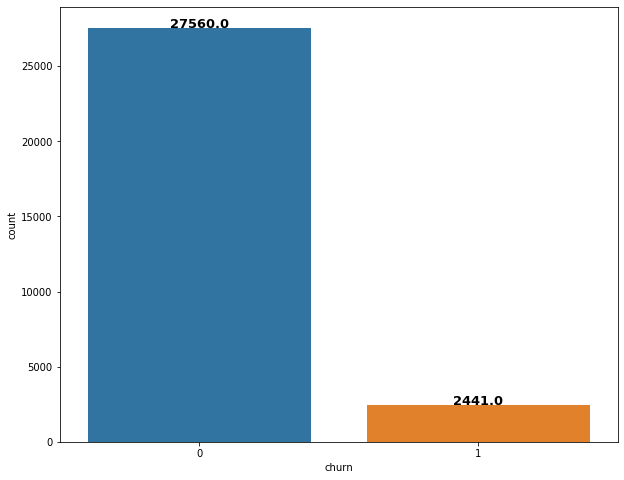

In [561]:
#plotting count plots using seaborn for categorical variables with help of matplotlib library 

plt.figure(figsize=(10, 8))
ax = sns.countplot(churn_data_filtered['churn'])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)


In [562]:
churn_data_filtered.columns.tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

# Univariate analysis for numeric variables

In [563]:
#Defining a common function for plotting distribution plot for all numeric variables
#Plot univariate distribution of one feature

def distribution_plot(feature,color):

    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.title('Distribution plot for numerical variables')
    sns.distplot(churn_data_filtered[feature],color=color, kde=True)
      
    plt.show() 

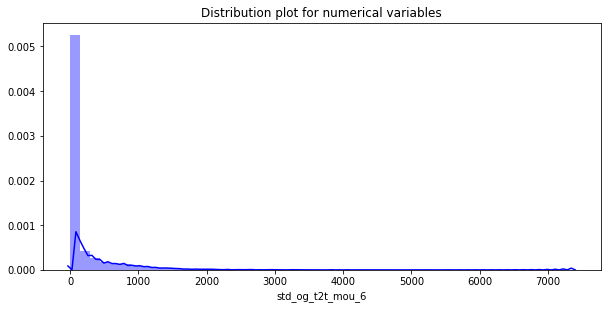

In [564]:
distribution_plot('std_og_t2t_mou_6','blue')

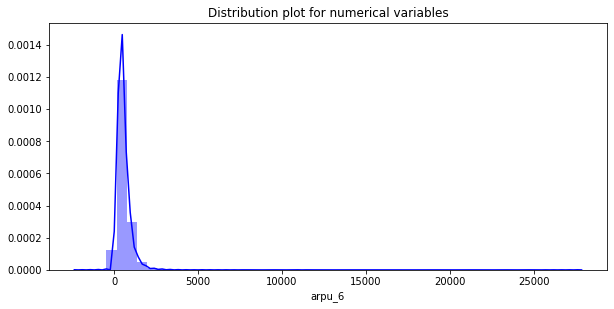

In [565]:
distribution_plot('arpu_6','blue')

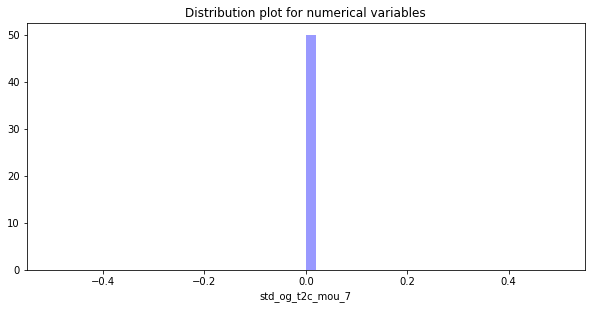

In [566]:
distribution_plot('std_og_t2c_mou_7','blue')

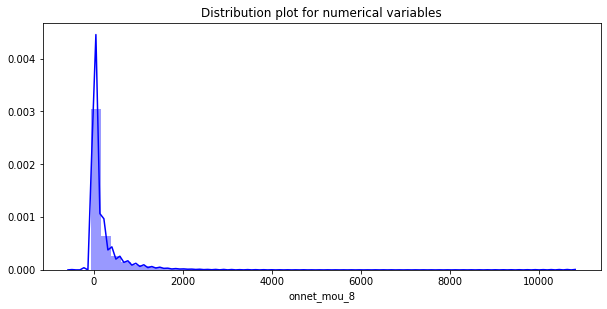

In [567]:
distribution_plot('onnet_mou_8','blue')

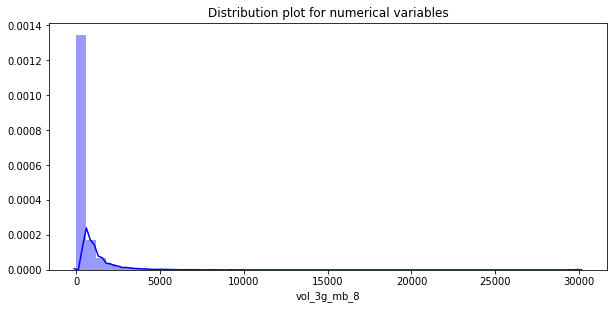

In [568]:
distribution_plot('vol_3g_mb_8','blue')

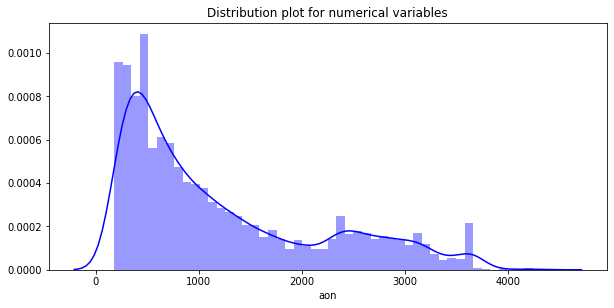

In [569]:
distribution_plot('aon','blue')

### Conclusion :

We can conclude from the above plots that many numeric variables are right skewed also after seeing the distribution for target variable "churn", we can observe that data is imbalanced and we need to handle the imbalance in the data class.

# Bivariate Analysis

(array([0, 1]), <a list of 2 Text xticklabel objects>)

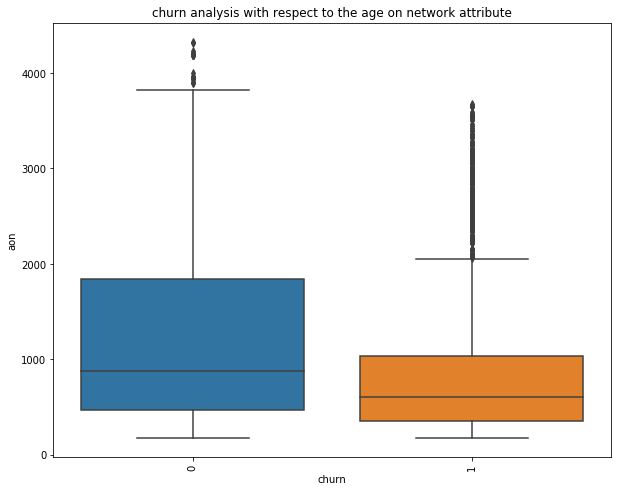

In [570]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="churn", y="aon", data= churn_data_filtered)
plt.title("churn analysis with respect to the age on network attribute")
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

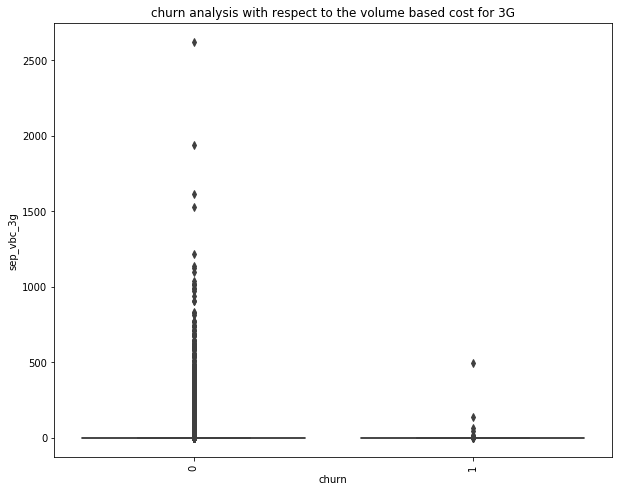

In [571]:
#sep_vbc_3g
plt.figure(figsize=(10, 8))
sns.boxplot(x="churn", y="sep_vbc_3g", data= churn_data_filtered)
plt.title("churn analysis with respect to the volume based cost for 3G")
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

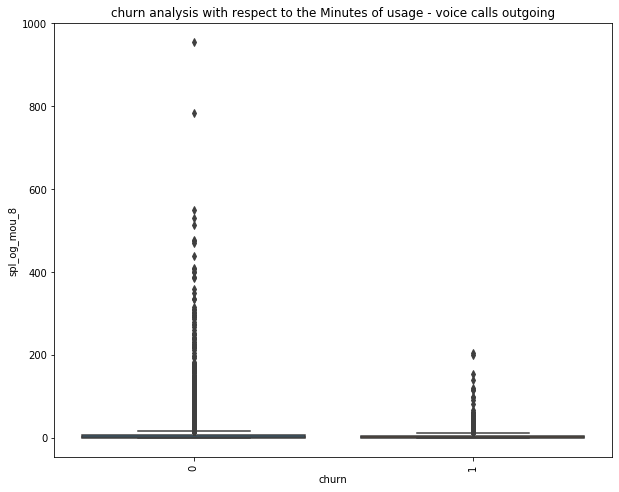

In [572]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="churn", y="spl_og_mou_8", data= churn_data_filtered)
plt.title("churn analysis with respect to the Minutes of usage - voice calls outgoing")
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

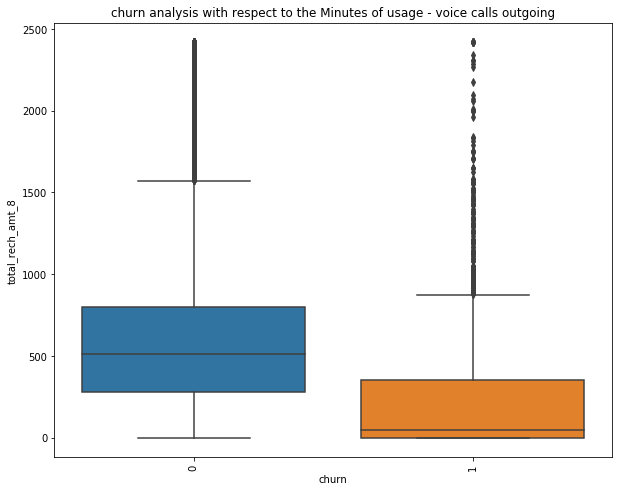

In [665]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="churn", y="total_rech_amt_8", data= churn_data_filtered)
plt.title("churn analysis with respect to the Minutes of usage - voice calls outgoing")
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

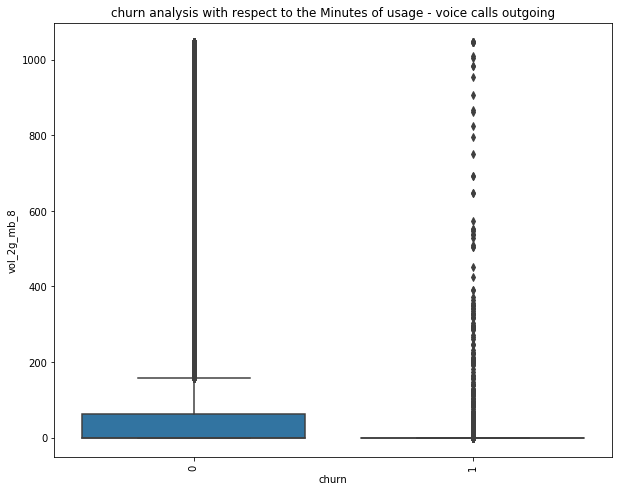

In [666]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="churn", y="vol_2g_mb_8", data= churn_data_filtered)
plt.title("churn analysis with respect to the Minutes of usage - voice calls outgoing")
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

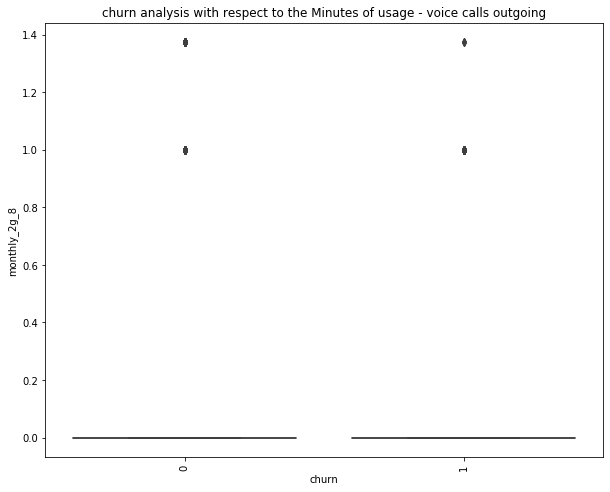

In [668]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="churn", y="monthly_2g_8", data= churn_data_filtered)
plt.title("churn analysis with respect to the Minutes of usage - voice calls outgoing")
plt.xticks(rotation=90)

### Conclusion:
#### We can conclude from the above plots for bivariate analysis that many variables have outliers present in the data. Let's treat outliers then.

In [573]:
churn_data_filtered.shape

(30001, 175)

In [574]:
churn_data_filtered.select_dtypes(['float64'])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.00,0.00,0.00,197.38,214.82,213.80,-44.39,-16.81,0.00,186.82,174.47,0.00,32.26,22.60,0.00,13.26,4.86,0.00,41.47,28.05,0.00,93.31,91.38,0.00,3.78,3.80,0.00,-7.81,-14.63,0.00,5.56,-11.81,0.00,92.58,94.14,0.00,87.12,90.61,0.00,1.19,1.18,0.00,0.00,0.00,0.00,120.97,126.92,0.00,-115.81,-103.84,0.00,3.91,4.98,0.00,0.45,0.04,0.00,0.00,0.00,0.00,53.01,40.92,0.16,107.48,107.12,4.13,12.07,12.59,1.15,66.17,59.32,5.44,23.30,19.74,0.00,20.72,21.65,0.00,2.16,2.22,0.00,0.00,0.00,0.00,0.47,0.55,0.00,0.00,0.00,5.44,-66.89,-65.54,0.00,7.81,8.25,0.00,0.85,1.01,0.00,4.00,3.00,2.00,362.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58,7.70,30.60,-180.64,-27.43,-9.06,3.12,-123.94,109.83,-4.44,0.00,-57.30,-0.51,-8.03,66.21,5.44,-1.50,-55.00,0.00,0.00,0.00,-9.97,-7.55
1,0.00,0.00,0.00,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,1580.00,790.00,3638.00,1580.00,79

In [347]:
churn_data_filtered.shape

(30001, 175)

### Conclusion: 

We can conclude from the above plots for bivariate analysis that many variables have outliers present in the data. Let's treat outliers then.

## Outliers treatment

In [576]:
def treat_outliers(arr, k=3):
    upper_lim = arr.mean() + k*arr.std()
    lower_lim = arr.mean() - k*arr.std()
    arr[arr<lower_lim] = lower_lim
    arr[arr>upper_lim] = upper_lim
    return arr

In [577]:
numeric_cols = churn_data_filtered.select_dtypes(['float64']).columns.tolist()

In [578]:
# treat outliers in the numeric columns
churn_data_filtered[numeric_cols] = churn_data_filtered[numeric_cols].apply(treat_outliers, axis=0)

In [579]:
churn_data_filtered.shape

(30001, 175)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

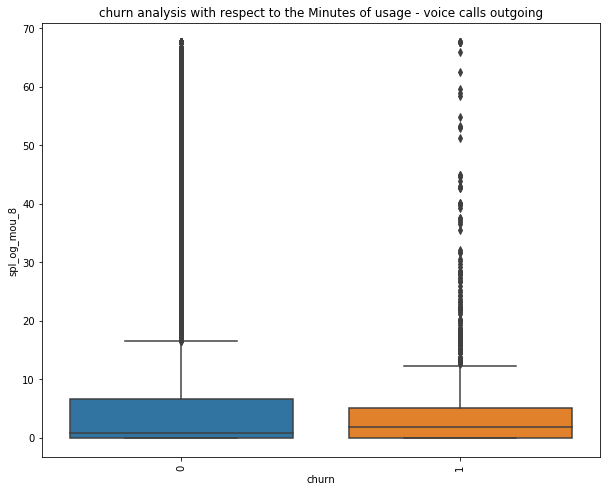

In [580]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="churn", y="spl_og_mou_8", data= churn_data_filtered)
plt.title("churn analysis with respect to the Minutes of usage - voice calls outgoing")
plt.xticks(rotation=90)

In [581]:
churn_data_filtered.shape

(30001, 175)

In [582]:
churn_data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_6_0.0,night_pck_6_1.0,night_pck_7_0.0,night_pck_7_1.0,night_pck_8_0.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.00,0.00,0.00,197.38,214.82,213.80,-44.39,-16.81,0.00,186.82,174.47,0.00,32.26,22.60,0.00,13.26,4.86,0.00,41.47,28.05,0.00,93.31,91.38,0.00,3.78,3.80,0.00,-7.81,-14.63,0.00,5.56,-11.81,0.00,92.58,94.14,0.00,87.12,90.61,0.00,1.19,1.18,0.00,0.00,0.00,0.00,120.97,126.92,0.00,-115.81,-103.84,0.00,3.91,4.98,0.00,0.45,0.04,0.00,0.00,0.00,0.00,53.01,40.92,0.16,107.48,107.12,4.13,12.07,12.59,1.15,66.17,59.32,5.44,23.30,19.74,0.00,20.72,21.65,0.00,2.16,2.22,0.00,0.00,0.00,0.00,0.47,0.55,0.00,0.00,0.00,5.44,-27.99,-27.23,0.00,7.81,8.25,0.00,0.85,1.01,0.00,4.00,3.00,2.00,362.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1,1,7.70,30.60,-180.64,-27.43,-9.06,3.12,-123.94,67.26,-4.44,0.00,-57.30,-0.51,-8.03,32.04,5.44,-1.50,-55.00,0.00,0.00,0.00,-9.97,-7.55
1,0.00,0.00,0.00,1069.18,1349.85,2014.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,

## Data Preparation Step:::

###  Change churn datatype from Categorical to numeric

In [583]:
churn_data_filtered['churn'] = pd.to_numeric(churn_data_filtered['churn'])

In [584]:
X = churn_data_filtered.drop("churn", axis = 1)
y = churn_data_filtered.churn

In [585]:
X.shape

(30001, 174)

## Data Standardization / Normalization

In [586]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

## Split Data into Train & Test

In [587]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [588]:
print("X_train Dataframe {}".format(X_train.shape))
print("X_test Dataframe  {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in X_Train Dataframe: {}".format(y_train_imb))
print("Imbalance in X_Test Dataframe: {}".format(y_test_imb))

X_train Dataframe (21000, 174)
X_test Dataframe  (9001, 174)
Imbalance in X_Train Dataframe: 0.08875985068436333
Imbalance in X_Test Dataframe: 0.08812862669245648


## Handling Imbalance data using Oversampling technique

In [589]:
# Balancing training dataset using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state =2)
X_train_new,y_train_new= sm.fit_sample(X_train,y_train)

In [590]:
print("X_train_new Dataframe {}".format(X_train_new.shape))
print("y_train_new Dataframe {}".format(y_train_new.shape))

data_imbalance = (y_train_new != 0).sum()/(y_train_new == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_train_new Dataframe (38576, 174)
y_train_new Dataframe (38576,)
Imbalance in Train Data: 1.0


# Data Modeling with multiple techniques

## 1. Logistic Regression with RFE without PCA for interpretability purpose

## Feature reduction using RFE

In [591]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_train_new, y_train_new)

In [592]:
len(rfe.support_)

174

In [593]:
#print(rfe.support_)
#print(rfe.ranking_) 
rfe_top_features = list(churn_data_filtered[churn_data_filtered.columns.difference(['churn'])].columns[rfe.support_])
print("Top 20 Features identified by RFE for model buidling: \n\n", rfe_top_features)

Top 20 Features identified by RFE for model buidling: 

 ['aug_vbc_3g', 'isd_ic_mou_7', 'isd_og_mou_6', 'isd_og_mou_8', 'loc_ic_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2t_mou_8', 'max_rech_amt_8', 'monthly_2g_7', 'monthly_3g_7', 'onnet_mou_7', 'roam_ic_mou_8', 'sachet_3g_6', 'spl_og_mou_7', 'std_ic_mou_diff', 'std_ic_t2o_mou_8', 'std_og_t2m_mou_6', 'total_rech_data_diff', 'total_rech_num_6']


In [594]:
X_rfe_final = pd.DataFrame(data=X_train_new).iloc[:, rfe.support_]
y_rfe_final = y_train_new

## Logistic Regression model using top 20 features selected by RFE (Recursive Feature Elimination) techinique

In [595]:
logreg_1 = LogisticRegression(random_state=1)
logreg_1.fit(X_rfe_final, y_rfe_final)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [596]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = logreg_1.predict(X_test_rfe)

In [597]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6873 1399]
 [ 139  590]]


In [598]:
print('Logistic Regression Accuracy: {:.2f}'.format(logreg_1.score(X_test_rfe, y_test)))

Logistic Regression Accuracy: 0.83


In [599]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8272
           1       0.30      0.81      0.43       729

    accuracy                           0.83      9001
   macro avg       0.64      0.82      0.67      9001
weighted avg       0.92      0.83      0.86      9001



### Conclusion :

1. Getting 82.0% accuracy
2. Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.
3. Top 20 Features identified by RFE for model buidling: 

 ['aug_vbc_3g', 'isd_ic_mou_7', 'isd_og_mou_6', 'isd_og_mou_8', 'loc_ic_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2t_mou_8', 'max_rech_amt_8', 'monthly_2g_7', 'monthly_3g_7', 'onnet_mou_7', 'roam_ic_mou_8', 'sachet_3g_6', 'spl_og_mou_7', 'std_ic_mou_diff', 'std_ic_t2o_mou_8', 'std_og_t2m_mou_6', 'total_rech_data_diff', 'total_rech_num_6']



## 2. Logistic Regression model using PCA (Principal Components Analysis) technique:

In [600]:
# PCA implementation

from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
train_pca = pca.fit_transform(X_train_new)

In [601]:
test_pca = pca.transform(X_test)

In [602]:
print(train_pca.shape)
print(test_pca.shape)

(38576, 174)
(9001, 174)


In [603]:
train_pca

array([[ 1.89734500e+00, -4.34147651e+00, -2.04010020e+00, ...,
        -0.00000000e+00,  5.72826040e-14,  0.00000000e+00],
       [ 7.14444581e-01, -4.89908040e+00, -2.77657043e+00, ...,
        -2.05359992e-14,  2.32920690e-16,  3.36773361e-15],
       [ 7.15681892e-01, -5.11317778e+00, -2.49972730e+00, ...,
        -1.15491899e-14, -1.76952024e-16, -2.45304262e-15],
       ...,
       [ 2.07524206e+00,  1.67555020e+00, -1.08497707e+00, ...,
        -7.40233944e-18, -1.58090208e-18, -1.84896154e-18],
       [ 2.20265355e+00, -5.32811111e+00, -1.81888251e+00, ...,
         3.51187151e-17,  1.32128264e-17,  3.70586153e-17],
       [-9.06147524e+00,  1.13936881e+00,  1.94778115e+00, ...,
        -3.39184087e-18,  2.19881869e-18, -2.63129232e-17]])

## Applying Logistic Regression on PCA data

In [604]:
log_reg_pca = LogisticRegression(C=1e9)
log_reg_pca.fit(train_pca, y_train_new)

# Prediction on test data
y_pred = log_reg_pca.predict(test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [605]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6997 1275]
 [ 145  584]]


In [606]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8422397511387624


In [607]:
pca.components_

array([[ 1.43314455e-19,  1.38777878e-16,  1.66533454e-16, ...,
         5.79887586e-02,  3.42933001e-02,  4.24267557e-02],
       [-3.75603854e-19,  2.22044605e-16, -0.00000000e+00, ...,
         5.33659540e-02,  4.39684568e-02,  2.57754906e-02],
       [-2.64570697e-19,  1.11022302e-16,  6.93889390e-17, ...,
        -4.74302164e-03,  1.26949434e-02, -1.22473051e-02],
       ...,
       [-0.00000000e+00, -2.33562428e-02, -7.80452917e-02, ...,
        -2.27682456e-17, -1.14491749e-16, -7.76288755e-17],
       [ 9.99999414e-01, -1.03306040e-03,  3.18185399e-04, ...,
        -8.84302397e-19,  5.69206141e-19,  2.71050543e-19],
       [ 0.00000000e+00,  9.45233316e-03,  6.98225883e-02, ...,
         1.06793914e-16, -1.59594560e-16, -1.00017650e-16]])

In [608]:
X.shape

(30001, 174)

In [609]:
pd.options.display.float_format = '{:.2f}'.format

In [618]:
colnames = list(churn_data_filtered[churn_data_filtered.columns.difference(['churn'])].columns)
pca_log_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pca_log_df.head(10)

,PC1,PC2,PC3,Feature
0,0.00,-0.00,-0.00,aon
1,0.00,0.00,0.00,arpu_6
2,0.00,-0.00,0.00,arpu_7
3,-0.02,0.14,0.10,arpu_8
4,0.08,0.13,0.07,arpu_diff
5,0.16,0.05,0.07,aug_vbc_3g
6,-0.02,0.16,-0.02,av_rech_amt_data_6
7,0.03,0.14,-0.03,av_rech_amt_data_7
8,0.08,0.08,-0.00,av_rech_amt_data_8
9,-0.02,0.17,0.06,av_rech_amt_data_diff


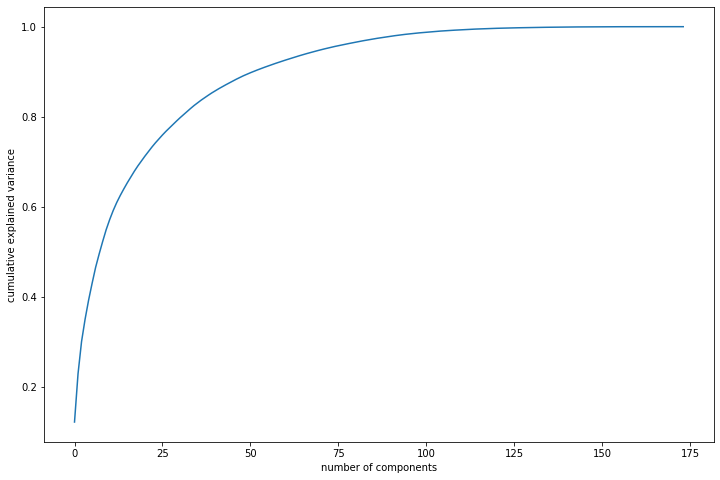

In [611]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [612]:
churn_data_filtered[churn_data_filtered.columns.difference(['churn'])].columns

Index(['aon', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_diff', 'aug_vbc_3g',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_diff',
       ...
       'total_rech_num_8', 'total_rech_num_diff', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_2g_mb_8', 'vol_2g_mb_diff', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_3g_mb_diff'],
      dtype='object', length=174)

## Apply logistic regression with 55 columns (90% explained variance)

In [613]:
pca_55 = PCA(n_components=55)


In [614]:
train_pca_55 = pca_55.fit_transform(X_train_new)
print(train_pca_55.shape)
test_pca_55 = pca_55.transform(X_test)
print(test_pca_55.shape)

(38576, 55)
(9001, 55)


In [615]:
log_reg_pca_1= LogisticRegression(C=1e9)
log_reg_pca_1.fit(train_pca_55, y_train_new)

# Prediction on test data
y_pred_55 = log_reg_pca_1.predict(test_pca_55)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [616]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_55))

[[6971 1301]
 [ 146  583]]


In [617]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred_55))

Logistic Regression accuracy with PCA:  0.8392400844350628



### Conclusion ::

1. Data is higly imbalanced. very less data is churn & remaining is non_churn
2. SMOTE is applied to balance data
3. 84% accuracy with default PCA
4. 90% variance can be explained with 55 columns and maintain 84% accuracy
5. Key features are aon
,
arpu_6
,
arpu_7
,
arpu_8
,
arpu_diff
,
aug_vbc_3g
,
av_rech_amt_data_6
,
av_rech_amt_data_7
,
av_rech_amt_data_8
,
av_rech_amt_data_diff

## 3. Random Forest

In [619]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [620]:
rfc.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [621]:
# Making predictions
y_pred = rfc.predict(X_test)

In [622]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# printing confusion matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8272
           1       0.58      0.63      0.60       729

    accuracy                           0.93      9001
   macro avg       0.77      0.80      0.78      9001
weighted avg       0.94      0.93      0.93      9001



In [623]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7935  337]
 [ 267  462]]


In [624]:
print("Random Forest accuracy : ",accuracy_score(y_test,y_pred))

Random Forest accuracy :  0.9328963448505722


In [443]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                return_train_score=True)
rf.fit(X_train_new, y_train_new)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [444]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.94,0.34,0.13,0.01,2,{'max_depth': 2},0.85,0.86,0.87,0.87,0.86,0.86,0.01,4,0.86,0.86,0.86,0.86,0.86,0.86,0.00
1,24.04,0.27,0.18,0.01,7,{'max_depth': 7},0.90,0.92,0.92,0.92,0.92,0.92,0.01,3,0.93,0.93,0.92,0.92,0.92,0.93,0.00
2,40.44,4.63,0.28,0.03,12,{'max_depth': 12},0.94,0.96,0.96,0.96,0.96,0.95,0.01,2,0.98,0.98,0.98,0.98,0.98,0.98,0.00
3,50.58,1.54,0.31,0.06,17,{'max_depth': 17},0.95,0.97,0.97,0.97,0.97,0.96,0.01,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


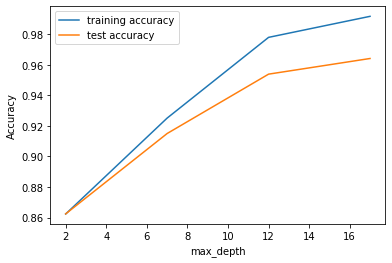

In [445]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [446]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1, 10, 1)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [447]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.21,0.03,0.01,0.00,1,{'n_estimators': 1},0.90,0.91,0.91,0.90,0.92,0.91,0.01,9,0.97,0.97,0.97,0.97,0.97,0.97,0.00
1,0.56,0.12,0.01,0.00,2,{'n_estimators': 2},0.94,0.94,0.94,0.93,0.94,0.94,0.00,7,0.97,0.97,0.97,0.97,0.97,0.97,0.00
2,0.83,0.15,0.01,0.00,3,{'n_estimators': 3},0.93,0.93,0.93,0.93,0.94,0.93,0.00,8,0.99,0.99,0.99,0.99,0.99,0.99,0.00
3,0.97,0.05,0.01,0.00,4,{'n_estimators': 4},0.94,0.94,0.94,0.94,0.94,0.94,0.00,6,0.98,0.98,0.98,0.98,0.98,0.98,0.00
4,1.21,0.09,0.01,0.00,5,{'n_estimators': 5},0.94,0.94,0.94,0.93,0.94,0.94,0.00,5,0.99,0.99,0.99,0.99,0.99,0.99,0.00


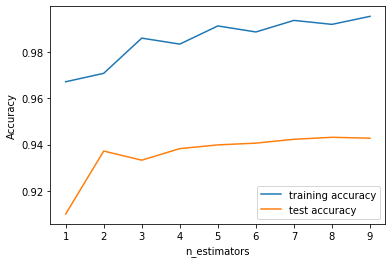

In [448]:

# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [449]:
# GridSearchCV to find optimal max_features

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10, 25, 50, 75 , 100]} 

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [450]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.22,0.35,0.14,0.01,10,{'max_features': 10},0.95,0.95,0.95,0.94,0.95,0.95,0.00,5,1.00,1.00,1.00,1.00,1.00,1.00,0.00
1,50.00,0.90,0.15,0.00,25,{'max_features': 25},0.95,0.95,0.94,0.94,0.95,0.95,0.00,3,1.00,1.00,1.00,1.00,1.00,1.00,0.00
2,107.13,1.27,0.15,0.00,50,{'max_features': 50},0.95,0.95,0.95,0.94,0.95,0.95,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
3,166.94,2.11,0.16,0.01,75,{'max_features': 75},0.95,0.95,0.95,0.94,0.95,0.95,0.00,4,1.00,1.00,1.00,1.00,1.00,1.00,0.00
4,227.09,5.22,0.15,0.01,100,{'max_features': 100},0.95,0.95,0.95,0.94,0.95,0.95,0.00,2,1.00,1.00,1.00,1.00,1.00,1.00,0.00


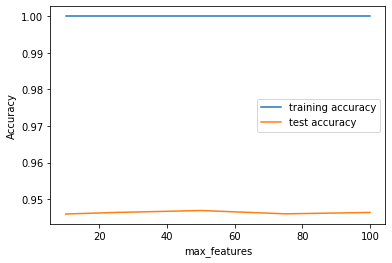

In [451]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [463]:
# Create the parameter grid based on the results of random search  
param_grid = {     'max_depth': [4,6,8,10],
                   'n_estimators': [1,2,3],
                   'max_features': [5,15,25,35] } 

# Create a based model 
rf = RandomForestClassifier() 

# Instantiate the grid search 
model_GSV = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1,verbose = 1) 

# Fit the grid search to the data grid_search.fit(X_train, y_train) 
model_GSV.fit(X_train_new, y_train_new)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   31.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [625]:
print('accuracy of',model_GSV.best_score_,'using',model_GSV.best_params_)

accuracy of 0.9237610091301681 using {'max_depth': 10, 'max_features': 35, 'n_estimators': 3}


In [626]:
# model with the best hyperparameters from sklearn.ensemble
rfc_best = RandomForestClassifier(bootstrap=True,         max_depth=10,
                                                           max_features=35,
                                                           n_estimators=3) 
rfc_best.fit(X_train_new,y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=35,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [466]:
# Making predictions
y_pred = rfc_best.predict(X_test)

In [467]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8272
           1       0.42      0.71      0.53       729

    accuracy                           0.90      9001
   macro avg       0.69      0.81      0.73      9001
weighted avg       0.93      0.90      0.91      9001



In [468]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[7543  729]
 [ 208  521]]


In [469]:
print(accuracy_score(y_test,y_pred))

0.8959004555049439


In [472]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = churn_data_filtered[churn_data_filtered.columns.difference(['churn'])].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [473]:
feature_importances.head(25)

,importance
ic_others_7,0.09
fb_user_8_0.0,0.07
onnet_mou_diff,0.04
total_rech_amt_7,0.04
sep_vbc_3g,0.04
monthly_3g_7,0.03
loc_ic_mou_6,0.03
total_rech_amt_8,0.03
spl_ic_mou_8,0.02
spl_og_mou_7,0.02


In [474]:
feature_importances_afterHPTuning= pd.DataFrame(rfc_best.feature_importances_,
                                   index = churn_data_filtered[churn_data_filtered.columns.difference(['churn'])].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_afterHPTuning.head(10)

,importance
fb_user_8_0.0,0.24
onnet_mou_diff,0.15
total_rech_amt_7,0.12
ic_others_7,0.04
total_og_mou_7,0.04
sep_vbc_3g,0.04
total_rech_amt_8,0.03
loc_ic_mou_6,0.02
std_og_t2t_mou_7,0.02
spl_og_mou_7,0.01


In [475]:
print(max(rfc.feature_importances_))

0.08559531917185298


In [476]:
print(max(rfc_best.feature_importances_))


0.2440973459256033


In [482]:
y_pred = rfc_best.predict(X_test)

In [486]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [484]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8272
           1       0.42      0.71      0.53       729

    accuracy                           0.90      9001
   macro avg       0.69      0.81      0.73      9001
weighted avg       0.93      0.90      0.91      9001



In [485]:
print(confusion_matrix(y_test,y_pred))

[[7543  729]
 [ 208  521]]


In [487]:
print("Random Forest accuracy final : ",accuracy_score(y_test,y_pred))

Random Forest accuracy final :  0.8959004555049439


## Conclusion::

1. Random forest is really better at getting accurate results and results are better than previous two techniques logistic regression and PCA.
2. It is able to achieve accuracy close to almost 90%.
3. Key features after performing hyperparameter tuning are: 
 fb_user_8_0.0
,
onnet_mou_diff
,
total_rech_amt_7
,
ic_others_7
,total_og_mou_7
,sep_vbc_3g
,total_rech_amt_8
,loc_ic_mou_6
,std_og_t2t_mou_7
,spl_og_mou_7


## 4. Ridge regularization technique in combination with RFE (Recursive Feature Elimination) technique

In [646]:
# Importing RFE 
from sklearn.feature_selection import RFE

In [647]:
# Running RFE with the output number of the variable equal to 20
log = LogisticRegression()
log.fit(X_train_new, y_train_new)

rfe = RFE(log, 20)             
rfe = rfe.fit(X_train_new, y_train_new)

In [648]:
list(zip(churn_data_filtered[churn_data_filtered.columns.difference(['churn'])].columns,rfe.support_,rfe.ranking_))

[('aon', False, 155),
 ('arpu_6', False, 154),
 ('arpu_7', False, 153),
 ('arpu_8', False, 127),
 ('arpu_diff', False, 19),
 ('aug_vbc_3g', True, 1),
 ('av_rech_amt_data_6', False, 139),
 ('av_rech_amt_data_7', False, 37),
 ('av_rech_amt_data_8', False, 9),
 ('av_rech_amt_data_diff', False, 23),
 ('fb_user_6_0.0', False, 13),
 ('fb_user_6_1.0', False, 10),
 ('fb_user_7_0.0', False, 102),
 ('fb_user_7_1.0', False, 65),
 ('fb_user_8_0.0', False, 134),
 ('fb_user_8_1.0', False, 128),
 ('ic_others_6', False, 117),
 ('ic_others_7', False, 11),
 ('ic_others_8', False, 28),
 ('isd_ic_mou_6', False, 77),
 ('isd_ic_mou_7', True, 1),
 ('isd_ic_mou_8', False, 30),
 ('isd_ic_mou_diff', False, 15),
 ('isd_og_mou_6', True, 1),
 ('isd_og_mou_7', False, 96),
 ('isd_og_mou_8', True, 1),
 ('isd_og_mou_diff', False, 52),
 ('jul_vbc_3g', False, 67),
 ('jun_vbc_3g', False, 82),
 ('last_day_rch_amt_6', False, 66),
 ('last_day_rch_amt_7', False, 29),
 ('last_day_rch_amt_8', False, 76),
 ('loc_ic_mou_6', True

In [649]:
col =churn_data_filtered[churn_data_filtered.columns.difference(['churn'])].columns[rfe.support_]
col

Index(['aug_vbc_3g', 'isd_ic_mou_7', 'isd_og_mou_6', 'isd_og_mou_8',
       'loc_ic_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2t_mou_8', 'max_rech_amt_8', 'monthly_2g_7', 'monthly_3g_7',
       'onnet_mou_7', 'roam_ic_mou_8', 'sachet_3g_6', 'spl_og_mou_7',
       'std_ic_mou_diff', 'std_ic_t2o_mou_8', 'std_og_t2m_mou_6',
       'total_rech_data_diff', 'total_rech_num_6'],
      dtype='object')

In [650]:
X_rfe_final = pd.DataFrame(data=X_train_new).iloc[:, rfe.support_]
y_rfe_final = y_train_new

In [651]:
# predict
from sklearn import metrics
y_train_pred = log.predict(X_train_new)
metrics.r2_score(y_true=y_train_new, y_pred=y_train_pred)

0.4437992534218167

In [652]:
y_test_pred = log.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.1344635612760121

### Applying Ridge regression

In [653]:
from sklearn.linear_model import Ridge

In [654]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   36.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [655]:

print("Best parameters:")
print(model_cv.best_params_)

Best parameters:
{'alpha': 20}


In [656]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.29,0.10,0.01,0.00,0.00,{'alpha': 0.0001},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,24,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
1,0.23,0.05,0.00,0.00,0.00,{'alpha': 0.001},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,23,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
2,0.22,0.03,0.00,0.00,0.01,{'alpha': 0.01},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,22,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
3,0.21,0.03,0.01,0.00,0.05,{'alpha': 0.05},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,21,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
4,0.22,0.05,0.00,0.00,0.10,{'alpha': 0.1},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,20,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
5,0.21,0.03,0.01,0.00,0.20,{'alpha': 0.2},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,19,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
6,0.21,0.05,0.00,0.00,0.30,{'alpha': 0.3},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,18,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
7,0.21,0.03,0.00,0.00,0.40,{'alpha': 0.4},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,17,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
8,0.23,0.07,0.01,0.00,0.50,{'alpha': 0.5},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,16,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01
9,0.23,0.03,0.01,0.00,0.60,{'alpha': 0.6},-0.33,-0.33,-0.29,-0.33,-0.32,-0.32,0.02,15,-0.26,-0.26,-0.27,-0.27,-0.27,-0.27,0.01


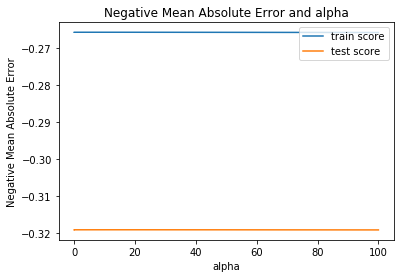

In [657]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [658]:
# since the Negative Mean Absolute Error stabilises at alpha = 20.0, we will choose this for further analysis

alpha = 20.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train_new)
ridge.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.07410063e-02,
        3.75895527e-03,  1.28095715e-01, -8.82910870e-03, -4.43493761e-02,
       -2.04816415e-02,  3.09211321e-02,  1.34111626e-02, -7.98640029e-02,
       -1.09947792e-03,  2.26211136e-02, -1.13866362e-02,  3.91619778e-03,
        2.31727184e-03,  4.75648457e-02,  1.58082608e-02,  4.07125399e-03,
       -2.79426837e-02,  2.55462252e-04, -2.23176503e-02, -4.31135270e-02,
       -3.80234464e-03, -3.05535889e-02,  1.35969255e-02, -6.45912554e-03,
       -1.28586157e-02,  1.80920028e-02, -1.49674280e-03, -6.31097894e-03,
        1.35488021e-02,  1.48612245e-02,  3.70992205e-02, -2.74588637e-02,
       -5.04929419e-03,  2.31850261e-02, -2.67522729e-02, -9.38435056e-04,
       -1.87839133e-03, -1.67724490e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.38110865e-02, -4.15843573e-02,  3.54317698e-03,
        7.84532568e-03,  1.65941664e-03, -8.91376023e-03, -7.60694507e-03,
       -7.46198399e-03, -

In [659]:
model_params = list(ridge.coef_)
model_params.insert(0, ridge.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = churn_data_filtered[churn_data_filtered.columns.difference(['churn'])].columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', 0.279),
 ('aon', 0.0),
 ('arpu_6', 0.0),
 ('arpu_7', 0.0),
 ('arpu_8', -0.031),
 ('arpu_diff', 0.004),
 ('aug_vbc_3g', 0.128),
 ('av_rech_amt_data_6', -0.009),
 ('av_rech_amt_data_7', -0.044),
 ('av_rech_amt_data_8', -0.02),
 ('av_rech_amt_data_diff', 0.031),
 ('fb_user_6_0.0', 0.013),
 ('fb_user_6_1.0', -0.08),
 ('fb_user_7_0.0', -0.001),
 ('fb_user_7_1.0', 0.023),
 ('fb_user_8_0.0', -0.011),
 ('fb_user_8_1.0', 0.004),
 ('ic_others_6', 0.002),
 ('ic_others_7', 0.048),
 ('ic_others_8', 0.016),
 ('isd_ic_mou_6', 0.004),
 ('isd_ic_mou_7', -0.028),
 ('isd_ic_mou_8', 0.0),
 ('isd_ic_mou_diff', -0.022),
 ('isd_og_mou_6', -0.043),
 ('isd_og_mou_7', -0.004),
 ('isd_og_mou_8', -0.031),
 ('isd_og_mou_diff', 0.014),
 ('jul_vbc_3g', -0.006),
 ('jun_vbc_3g', -0.013),
 ('last_day_rch_amt_6', 0.018),
 ('last_day_rch_amt_7', -0.001),
 ('last_day_rch_amt_8', -0.006),
 ('loc_ic_mou_6', 0.014),
 ('loc_ic_mou_7', 0.015),
 ('loc_ic_mou_8', 0.037),
 ('loc_ic_mou_diff', -0.027),
 ('loc_ic_t2f_

In [660]:
# ridge regression
lm = Ridge(alpha=20)
lm.fit(X_train_new, y_train_new)

# predict
y_train_pred = lm.predict(X_train_new)
print(metrics.r2_score(y_true=y_train_new, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.5260475393635401
-0.7667353527102145


In [661]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.36263023803821365


In [663]:

ridge_params= pd.DataFrame(list(zip(cols, model_params)))
ridge_params.columns = ['feature', 'Coefficient']
ridge_params.sort_values((['Coefficient']), axis = 0, ascending = False, inplace=True)
ridge_params.head()

,feature,Coefficient
0,constant,0.28
6,aug_vbc_3g,0.13
60,loc_og_t2o_mou,0.06
18,ic_others_7,0.05
72,monthly_3g_7,0.05


In [664]:
ridge_params[(ridge_params['Coefficient'] != 0)]

,feature,Coefficient
0,constant,0.28
6,aug_vbc_3g,0.13
60,loc_og_t2o_mou,0.06
18,ic_others_7,0.05
72,monthly_3g_7,0.05
169,vol_2g_mb_8,0.04
112,spl_og_mou_8,0.04
59,loc_og_t2m_mou_8,0.04
35,loc_ic_mou_8,0.04
166,total_rech_num_diff,0.04


### Conclusion :::

1. We can observe that ridge regularization technique has given a very low accuracy
2. Though it is able to improve the accuracy of the model after applying RFE but can not be reliable in making predictions.

## Final Conclusion on all models:::

1. Logistic Regression without PCA

Accuracy around 82 %

2. Logistic Refression with PCA 

Accuracy around 84%

3. Random Forest without PCA

Accuracy around 90%

4. Logistic regression with Ridge regularization technique

Accuracy around 50%

## Important Driver variables for all the models:
    

1. <b> Logistic Regression without PCA :<br> </b>
'aug_vbc_3g', 'isd_ic_mou_7', 'isd_og_mou_6', 'isd_og_mou_8', 'loc_ic_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2t_mou_8', 'max_rech_amt_8', 'monthly_2g_7', 'monthly_3g_7', 'onnet_mou_7', 'roam_ic_mou_8', 'sachet_3g_6', 'spl_og_mou_7', 'std_ic_mou_diff', 'std_ic_t2o_mou_8', 'std_og_t2m_mou_6', 'total_rech_data_diff', 'total_rech_num_6' <br><br>
2. <b> Logistic regression with PCA : <br> </b>
Key features are aon , arpu_6 , arpu_7 , arpu_8 , arpu_diff , aug_vbc_3g , av_rech_amt_data_6 , av_rech_amt_data_7 , av_rech_amt_data_8 , av_rech_amt_data_diff <br>
<br>
3. <b> Random Forest:  <br> </b>
   Key features after performing hyperparameter tuning are: fb_user_8_0.0 , onnet_mou_diff , total_rech_amt_7 , ic_others_7 ,total_og_mou_7 ,sep_vbc_3g ,total_rech_amt_8 ,loc_ic_mou_6 ,std_og_t2t_mou_7 ,spl_og_mou_7 <br><br>
   
4. <b>Ridge Regularization technique: <br> </b>
aug_vbc_3g
,
loc_og_t2o_mou
,
ic_others_7
,
monthly_3g_7
,
vol_2g_mb_8
,
spl_og_mou_8
,
loc_og_t2m_mou_8
,
loc_ic_mou_8
,
total_rech_num_diff
,
av_rech_amt_data_diff



# Recommendations ::: 

1. Discounts offer for outgoing packs for calls <br><br>

2. For high value customers, oberve the patterns and amount of the total recharge, provide offers on additional talk time with extended validity on the recharges<br>
<br>
3. Provide additional discounts to the customers who have been with the service provider for more than an year or less than 3 months<br><br>

4. Provide additional data on data related recharges.<br>
<br>
5. Try and proide the best customer care service in case of any doubts arising on customer churn or any other customer queries and resolve on time to retain existing customer base.<br>
<br>
6. Same network calls charges can be decreased for all the customers in the same network<br>
<br>
7. Also, keep an eye on those customers who are not under any specific scheme and try and check with them regarding any sccheme if they can avail from the service provides to avail more discounted talk time and data related charges